# CW09
##### Jack Savage and Raha

In [1]:
%matplotlib inline
import math
import array_calculus as calc
import numpy as np
import matplotlib.pyplot as plt

### The Problem
In this assignment, our task is to create a function that calculates the derivative of a function $f$ using the central finite difference operator (except at $n_{0}$ and $n_{max}$ where forward and backwards difference must be used).

### The Solution

Our solution uses the central, forwards, and backwards difference formulae to create a finite difference linear operator. This operator's dot product with a y-value vector yields a gradient vector with points $y'(x)$ mapped to each original $y$. 

*Central Difference*
$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x-h)}{(x+h)-(x-h)}$

*Forward Difference:
$f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{(x + h) - x}$*

*Backwards Difference:
$f'(x) = \lim_{h\to 0} \frac{f(x) - f(x - h)}{x - (x - h)}$*

To construct our linear operator, we first need to create a two dimensional matrix, with each row corresponding to a list of all x-values. For each $n$ we wish to evaluate $(x_{n+1}-x_{n-1})/2dx$ when the matrix is applied to a vector. Fortunately, we are using evenly spaced points for our x-values, so $dx$ will be a constant we can divide by at the end. Unfortunately, we can't evaluate the central difference formula at the first and last x-values. At these points we use the forwards and backwards difference formulae to approximate $f'(x)$. These can be evaluated as $(x_{n+1}-x_{n})/dx$ and $(x_{n}-x_{n-1})/dx$ respectively.

The matrix we seek is as follows:

1. First Row: $[1,1,0...]$
2. Inner Rows: $[0,0.5,0,0.5,0...]$
3. Final Row: $[...0,1,1]$

*Note that we precompute the 1/2 used in the next operation*

To find our vector of gradients, we apply this matrix to the $y$ vector and divide the result by $dx$.

## $x^2$

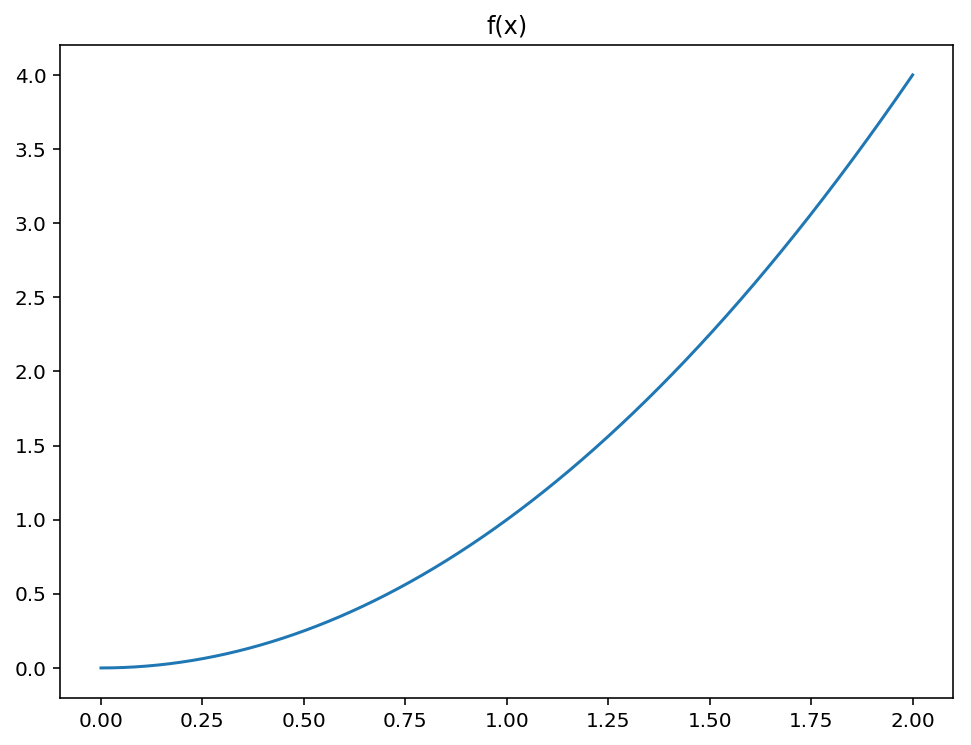

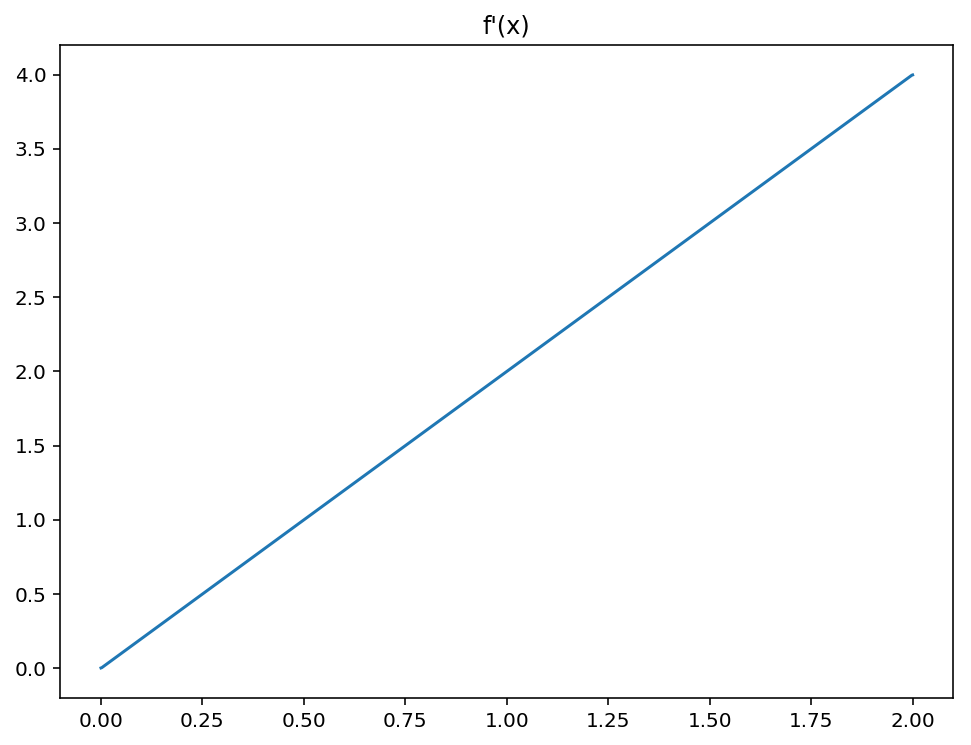

In [2]:
calc.plot_derivatives(np.linspace(0,2,1000), np.square)

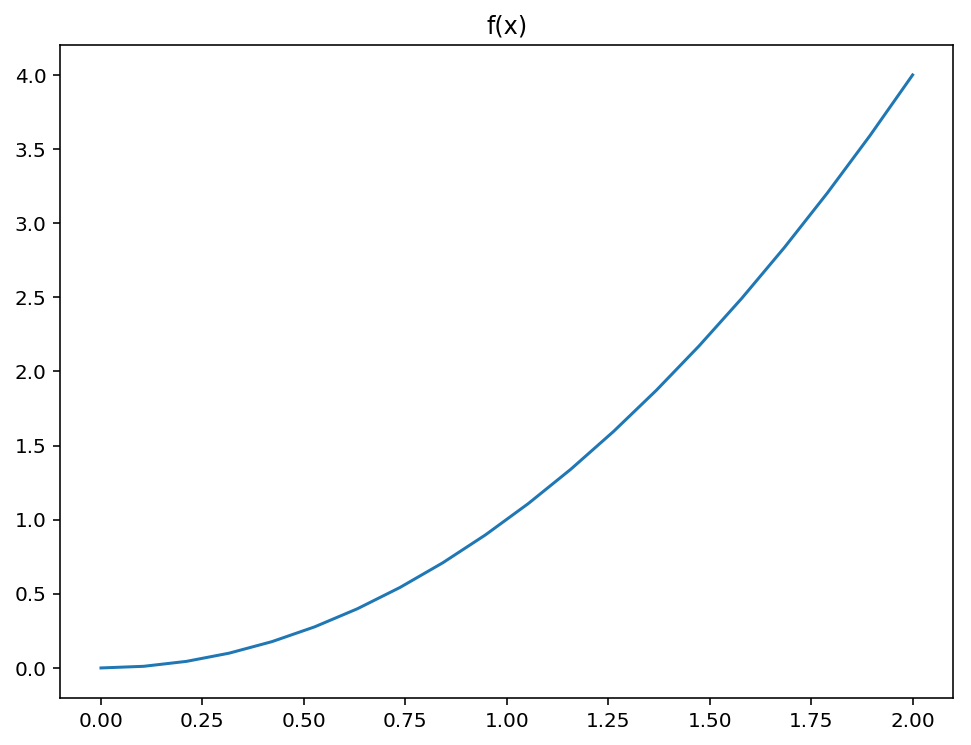

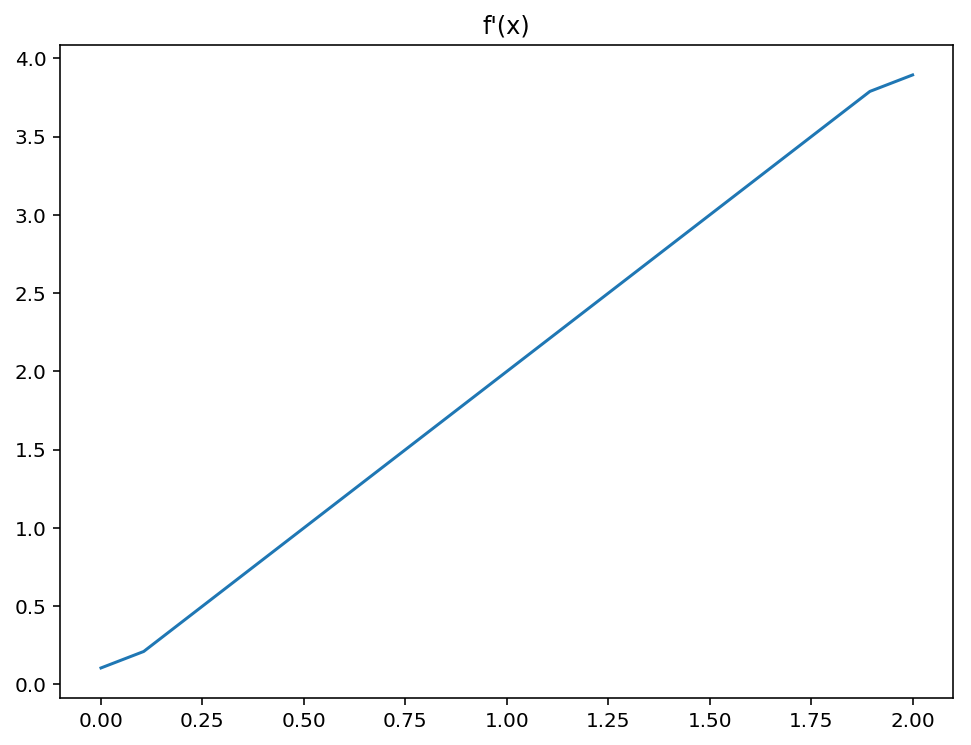

In [8]:
calc.plot_derivatives(np.linspace(0,2,20), np.square)

**Comments:**  $f'(x)$ is linear with slope of 1, as expected for the exponential growth function. With a lower $n$ value, the shortcomings of the forward and backwards difference formulae become apparent.

## $sin(x)$

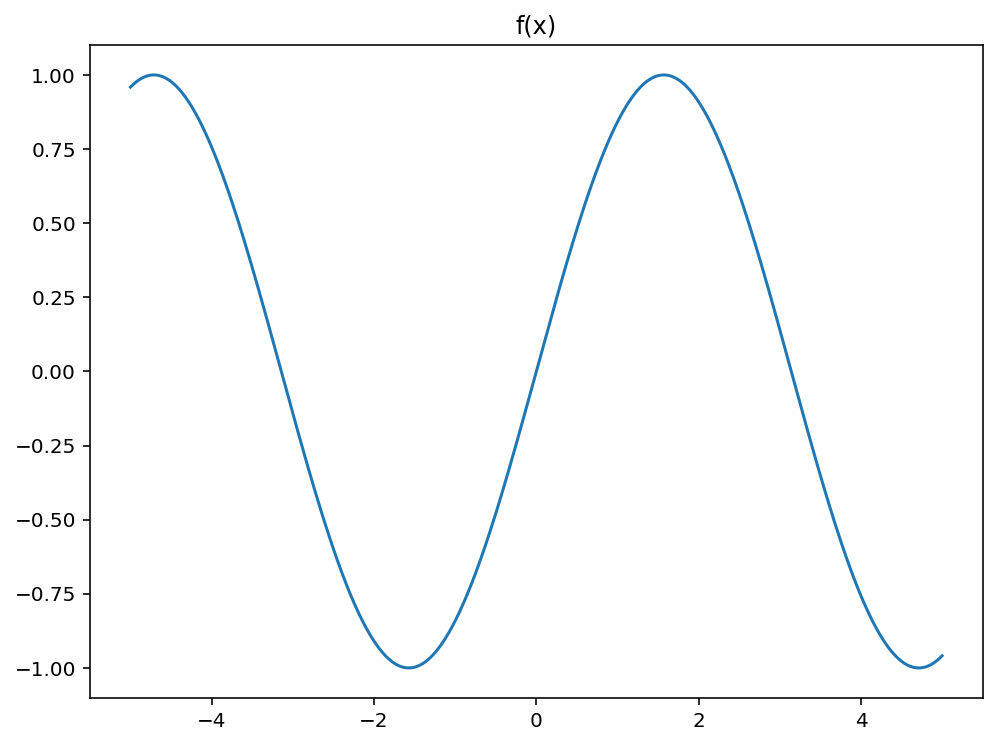

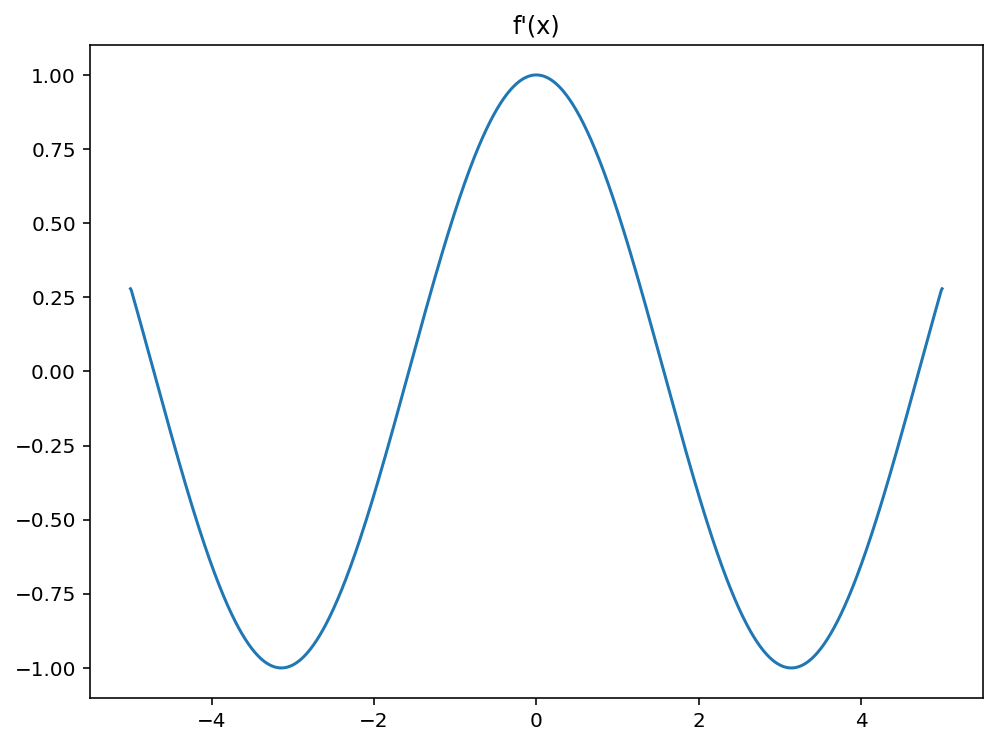

In [3]:
calc.plot_derivatives(np.linspace(-5,5,1000), np.sin)

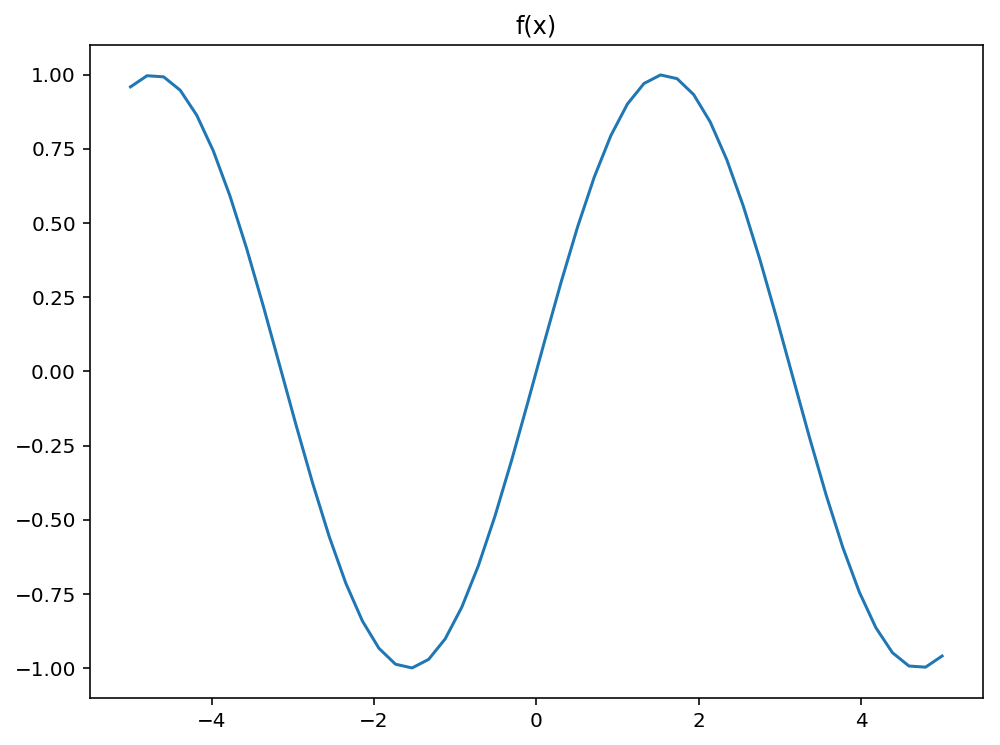

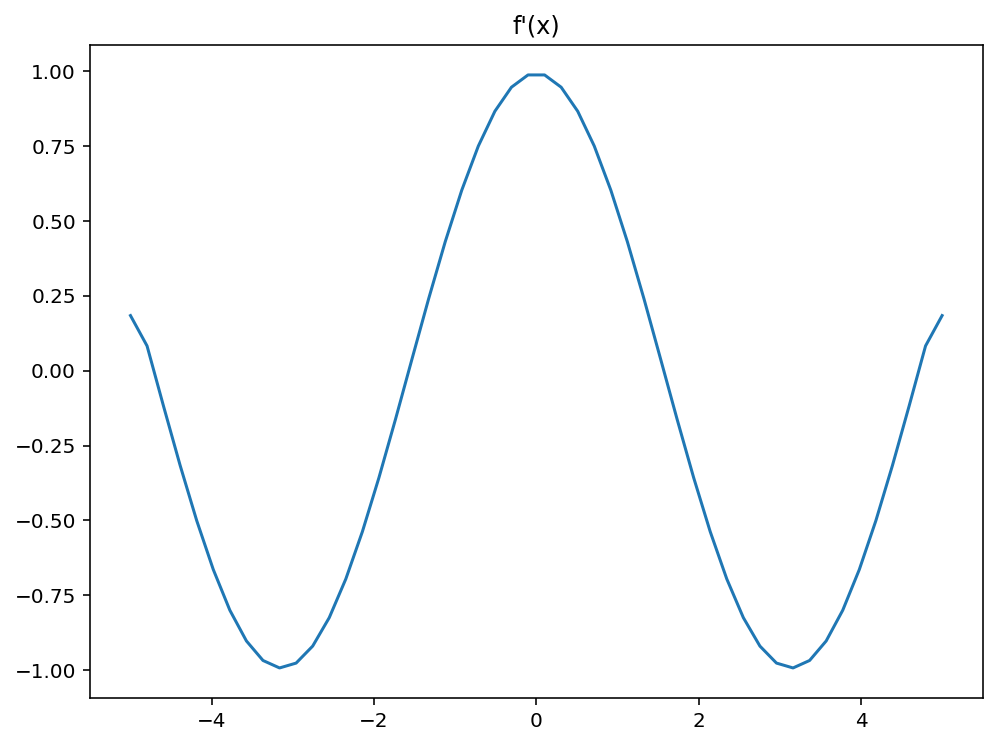

In [11]:
calc.plot_derivatives(np.linspace(-5,5,50), np.sin)

**Comments:** $f'(x)$ is cos(x), as expected. Flawed $f(x)$ beginning and end behavior similar to previous example.

## $exp(x^2/2)/\sqrt{2\pi}$

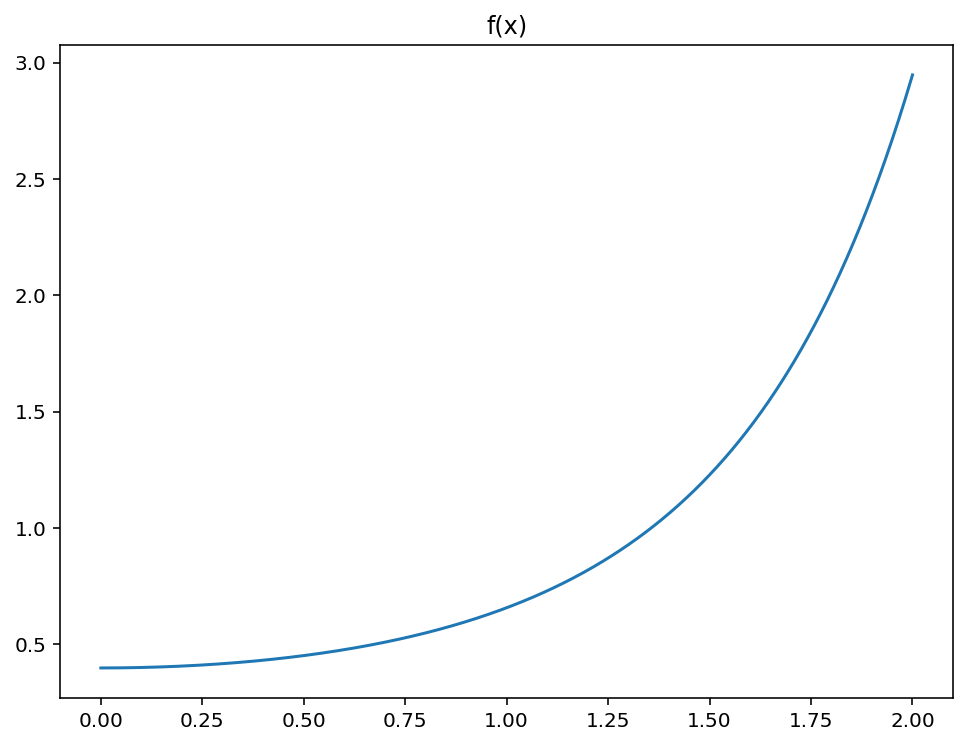

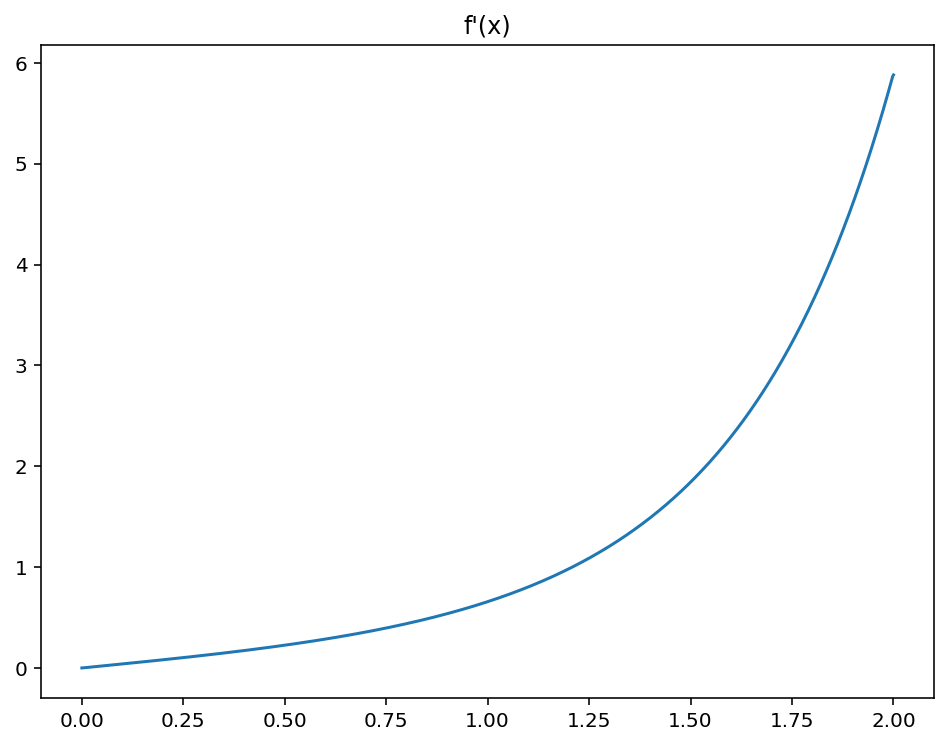

In [4]:
def third_function(x):
    return np.exp((x**2)/2)/math.sqrt(2*math.pi)

calc.plot_derivatives(np.linspace(0,2,1000), third_function)

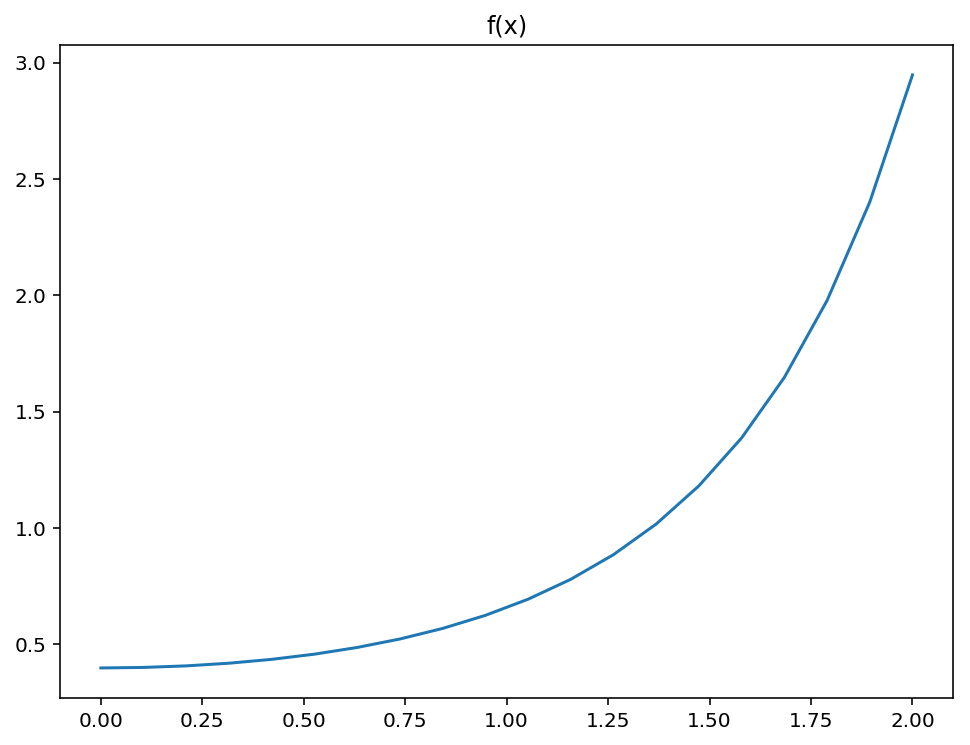

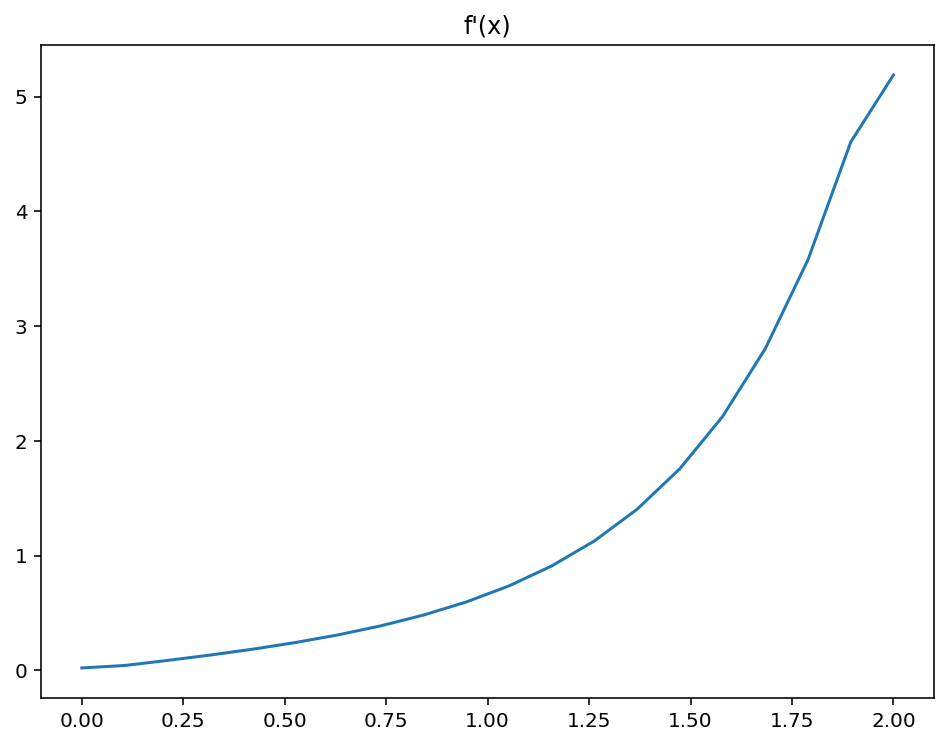

In [13]:
calc.plot_derivatives(np.linspace(0,2,20), third_function)

**Comments:** Due to complexity of function, had no intuition on behavior. Visually, the proposed gradients seem plausible. Yet again, first and last gradient results slightly off. (Perhaps temporary values could be constructed to be used for central difference at beginning and end)